In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [2]:
import pandas as pd
import numpy as np 
data = pd.read_csv('/content/grive/MyDrive/Data/TATAMOTORS.NS (1).csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-29,132.000000,133.000000,130.000000,131.899994,131.899994,66632704.0
1,2020-10-30,133.199997,134.500000,130.300003,132.649994,132.649994,51128530.0
2,2020-11-02,133.649994,134.000000,131.100006,132.850006,132.850006,40388690.0
3,2020-11-03,135.000000,137.399994,133.550003,134.100006,134.100006,52071476.0
4,2020-11-04,135.600006,137.000000,134.000000,135.899994,135.899994,44675934.0


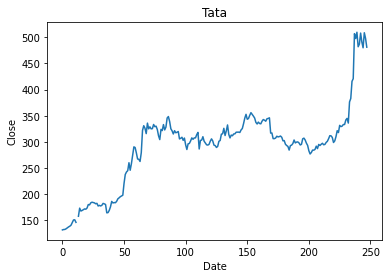

In [4]:
import matplotlib.pyplot as plt

close = data['Close']
ax = close.plot(title='Tata')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [5]:
# we choose these features so that we can predict stock prices 
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [6]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [7]:
data

,ds,y
0,2020-10-29,131.899994
1,2020-10-30,132.649994
2,2020-11-02,132.850006
3,2020-11-03,134.100006
4,2020-11-04,135.899994
...,...,...
243,2021-10-22,490.899994
244,2021-10-25,479.899994
245,2021-10-26,508.649994
246,2021-10-27,497.899994


In [8]:
from fbprophet import Prophet
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
608,2022-10-24,1033.969410,745.297988,1312.252383
609,2022-10-25,1036.807424,739.775602,1313.384438
610,2022-10-26,1040.712222,742.948762,1329.826540
611,2022-10-27,1042.559735,746.640421,1330.945639
612,2022-10-28,1041.527719,748.446544,1331.718695


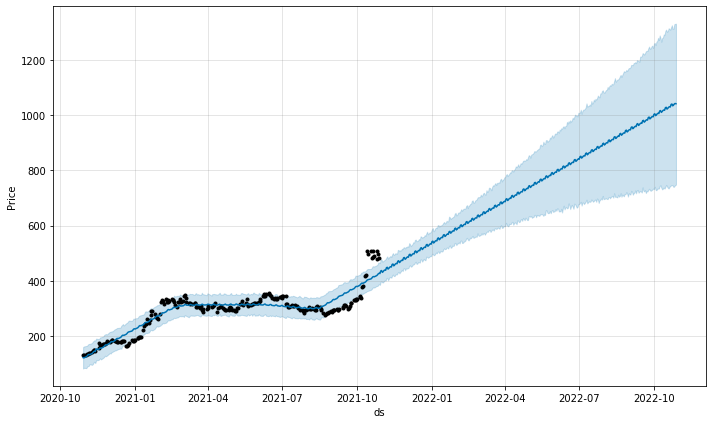

In [9]:
graph = model.plot(forcast, xlabel="ds", ylabel="Price")

In [ ]:
# conclusion 
#tatamotars stock prices will increase  in the coming future